# Airline Passenger Satisfaction Classfier

This project is deals with a classification problem of defining the various factors that lead to a satisfactory or unsatisfactory experience for an airline passenger. The dataset for this problem is available on Kaggle.com (https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv). The dataset consists of 103905 data points in the train set and 25977 data points in the test set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import f1_score,r2_score,recall_score,precision_score,RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pickle

In [2]:
data_init=pd.read_csv("archive/train.csv")
data_init=pd.DataFrame(data_init)

In [3]:
data_init

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
#Removing unnecessary index column
data_init.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
data_init

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
# Searching for nan values
data_init.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

### Cleaning the dataset

In [67]:
#Removing NAN values in Arrival Delay in Minutes Column
data_init["Arrival Delay in Minutes"].fillna(np.mean(data_init["Arrival Delay in Minutes"]),inplace=True)

In [8]:
# Representing string values with binary classifications (satisfied=1/neutral or dissatisfied=0)
data_init["satisfaction"].replace(["satisfied","neutral or dissatisfied"],[1,0],inplace=True)

In [9]:
# Representing string values with binary classifications (male=1/female=0)
data_init["Gender"].replace(["Male","Female"],[1,0],inplace=True)

In [10]:
# Representing string values with binary classifications (loyal  customer=1/disloyal customer=0)
data_init["Customer Type"].replace(["Loyal Customer","disloyal Customer"],[1,0],inplace=True)

In [11]:
# Representing string values with binary classifications (Personal Travel=0/Business Travel=1)
data_init["Type of Travel"].replace(["Personal Travel","Business travel"],[0,1],inplace=True)

In [12]:
# Replacing categorical data with numerical values (Eco=0/Eco Plus=1/Business=2)
data_init["Class"].replace(["Eco","Eco Plus","Business"],[0,1,2],inplace=True)

In [13]:
train=data_init

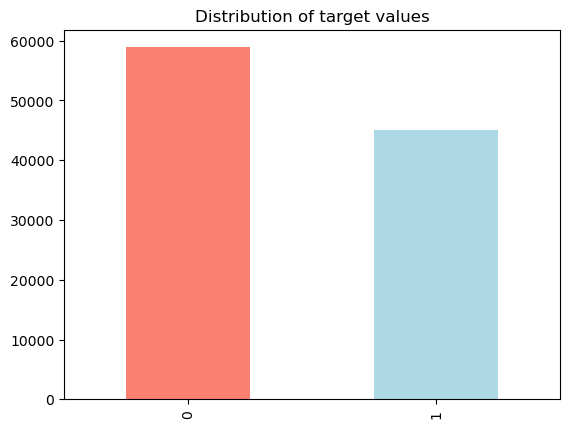

In [66]:
train["satisfaction"].value_counts().plot(kind='bar',color=["salmon","lightblue"],title="Distribution of target values");

In [15]:
train.drop(["id","Gate location"],inplace=True,axis=1)

### Visualizing the data

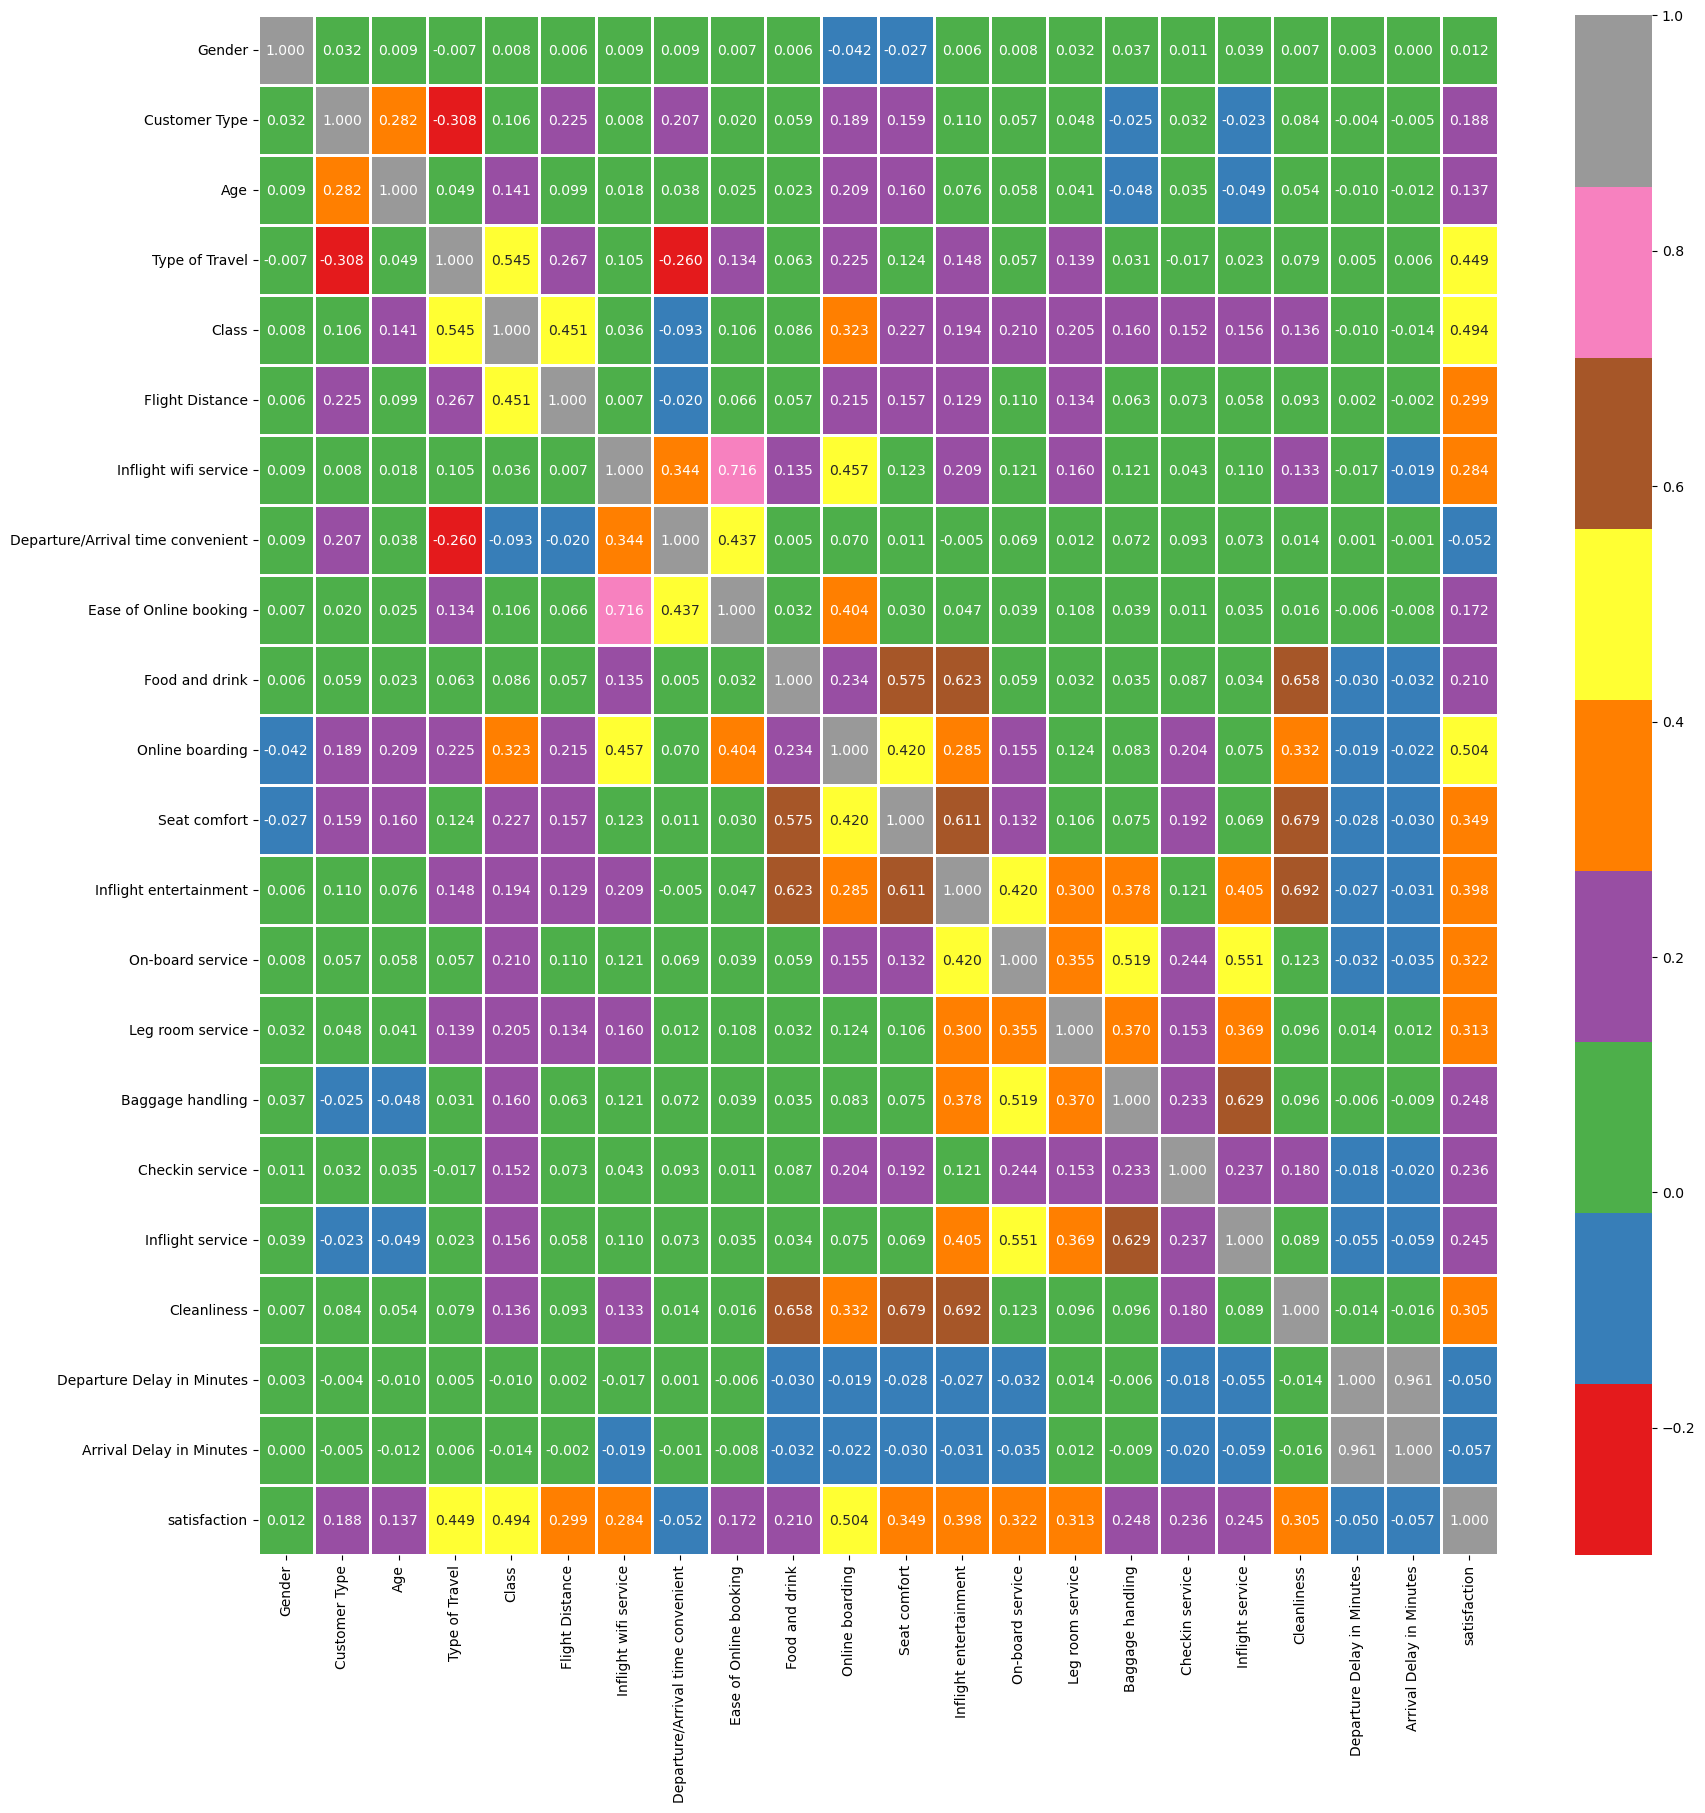

In [81]:
corr=train.corr(numeric_only=True)
fig,ax=plt.subplots(figsize=(20,20));
ax=sns.heatmap(corr,annot=True,linewidth=1,fmt=".3f",cmap="Set1")

In [17]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,1,460,3,4,3,5,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,1,2,235,3,2,3,1,...,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,1,2,1142,2,2,2,5,...,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,1,2,562,2,5,5,2,...,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,1,2,214,3,3,3,4,...,3,3,4,4,3,3,3,0,0.0,1


In [18]:
train.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.817322,39.379706,0.689627,1.028103,1189.448375,2.729683,3.060296,2.756901,3.202129,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,0.499947,0.386404,15.114964,0.462649,0.962858,997.147281,1.327829,1.525075,1.398929,1.329533,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909,0.495538
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,40.000000,1.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,51.000000,1.000000,2.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


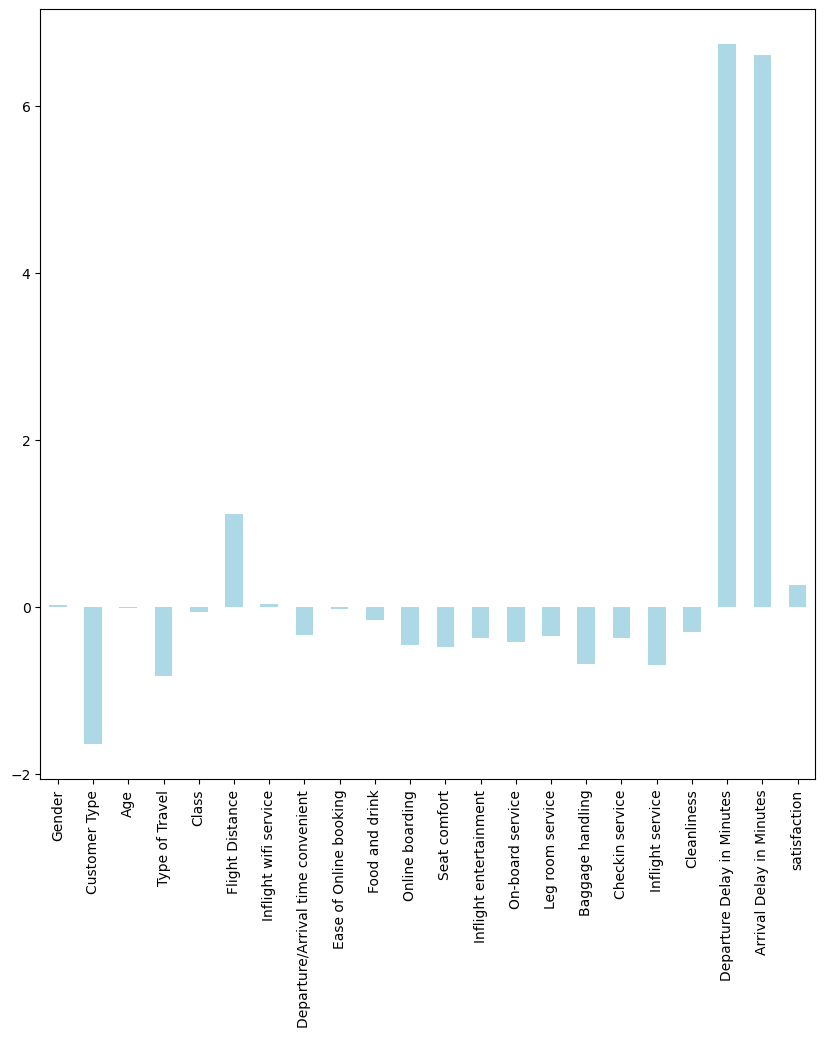

In [86]:
train.skew().T.plot.bar(figsize=(10,10),color='lightblue');

### Modeling

In [20]:
X=train.drop(["satisfaction"],axis=1)
y=train["satisfaction"]

In [21]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)

In [22]:
# Random Forest Classifier offers an accuracy percentage ~ 96%
np.random.seed(42)
model1=RandomForestClassifier()
model1.fit(X_train,y_train)
model1.score(X_val,y_val)

0.9613108127616573

In [23]:
np.random.seed(42)
# SGD Classifier offers an accuracy of ~ 84% on its own. After applying Kernel approximation using RBFSampler, a decrease in 
# the accuracy percentage is observed (~ 56%).
#rbf=RBFSampler(gamma=1)
#X=rbf.fit_transform(X_train)
#model2=SGDClassifier()
#model2.fit(X_train,y_train)
#model2.score(X_val,y_val)

In [24]:
np.random.seed(42)
#model3=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
#model3.fit(X_train,y_train)
#model3.score(X_val,y_val)

### Proceeding with Random Forest Classifier due to higher accuracy.

### Randomized Search CV

In [25]:
#rf_grid={'bootstrap': [True, False],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
#rf_random = RandomizedSearchCV(estimator = model1, param_distributions = rf_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#rf_random.fit(X_train,y_train)
#rf_random.score(X_val,y_val)

In [87]:
#Save the trained model
#pickle.dump(rf_random,open("random_forest_rcv.pkl","wb"))

### Grid Search CV

In [ ]:
#forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
#rf_gcv = GridSearchCV(model1, forest_params, cv = 5, scoring='accuracy',n_jobs=-1)
#rf_gcv.fit(X_train, y_train)
#rf_gcv.score(X_val,y_val)

In [ ]:
#Save the trained mdoel
#pickle.dump(rf_gcv,open("random_forest_gcv.pkl","wb"))

In [29]:
#Load the trained model
model1=pickle.load(open('random_forest_rcv.pkl','rb'))

### Formatting test data

In [30]:
#Remodel test data
test=pd.read_csv("archive/test.csv")
test=pd.DataFrame(test)

In [31]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [32]:
test.drop(['Unnamed: 0','id'],inplace=True,axis=1)

In [33]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [34]:
test.drop(['Gate location'],inplace=True,axis=1)

In [35]:
test.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [36]:
test["Arrival Delay in Minutes"].fillna(np.mean(test["Arrival Delay in Minutes"]),inplace=True)

In [37]:
test["Gender"].replace(['Male','Female'],[1,0],inplace=True)

In [38]:
test["satisfaction"].replace(["satisfied","neutral or dissatisfied"],[1,0],inplace=True)

In [39]:
test["Customer Type"].replace(['Loyal Customer','disloyal Customer'],[1,0],inplace=True)

In [40]:
test["Type of Travel"].replace(["Personal Travel","Business travel"],[0,1],inplace=True)

In [41]:
test["Class"].replace(["Eco","Eco Plus","Business"],[0,1,2],inplace=True)

In [42]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,52,1,0,160,5,4,3,3,...,5,5,5,5,2,5,5,50,44.0,1
1,0,1,36,1,2,2863,1,1,3,5,...,4,4,4,4,3,4,5,0,0.0,1
2,1,0,20,1,0,192,2,0,2,2,...,2,4,1,3,2,2,2,0,0.0,0
3,1,1,44,1,2,3377,0,0,0,3,...,1,1,1,1,3,1,4,0,6.0,1
4,0,1,49,1,0,1182,2,3,4,4,...,2,2,2,2,4,2,4,0,20.0,1


In [43]:
X_test=test.drop(['satisfaction'],axis=1)
y_test=test['satisfaction']

In [44]:
y_preds=model1.predict(X_test)

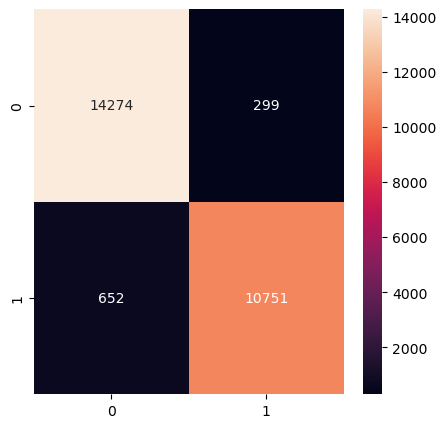

In [63]:
#Confusion matrix
cf_mat=confusion_matrix(y_test,y_preds)
cf_mat
fig,ax=plt.subplots(figsize=(5,5))
ax=sns.heatmap(cf_mat,annot=True,fmt='d')

In [46]:
def scoring(model1):
    f1=f1_score(y_test,y_preds,average='weighted')
    r2=r2_score(y_test,y_preds)
    recall=recall_score(y_test,y_preds,average='weighted')
    precision=precision_score(y_test,y_preds,average='weighted')
    return {'f1 score':f1,'r2 score':r2,'recall score':recall,'precision score':precision}
    

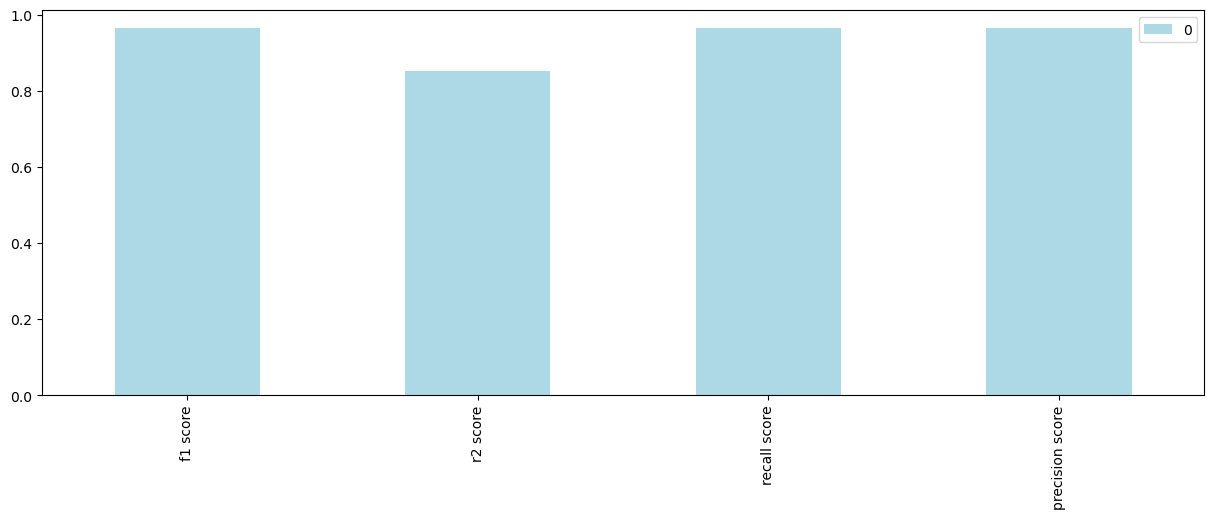

In [69]:
score=scoring(model1)
score=pd.DataFrame(score,index=[0])
score.T.plot.bar(figsize=(15,5),color=['lightblue']);

In [ ]:
rf_disp=RocCurveDisplay.from_estimator(model1,X_test,y_preds)

In [106]:
blist=model1.best_params_
blist

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [72]:
#rf_model=RandomForestClassifier(n_estimators=1600,min_samples_split=10,min_samples_leaf=1,max_features='auto',max_depth=None,bootstrap=False,n_jobs=-1)
#rf_model.fit(X_train,y_train)
#rf_model.feature_importances_
rf_model=pickle.load(open('rf_model_best.pkl','rb'))

In [73]:
#pickle.dump(rf_model,open('rf_model_best.pkl','wb'))

In [74]:
rf_model.feature_importances_

array([0.0024982 , 0.04091199, 0.02519216, 0.10812162, 0.106526  ,
       0.02913502, 0.15618225, 0.01638669, 0.03955809, 0.00985671,
       0.18069078, 0.04735891, 0.06438867, 0.02799787, 0.03649082,
       0.02429777, 0.02098673, 0.02224668, 0.02500266, 0.00728631,
       0.00888407])

In [75]:
feature_dict=dict(zip(train.columns,list(rf_model.feature_importances_)))

In [76]:
feature_dict

{'Gender': 0.0024982033079877144,
 'Customer Type': 0.04091198800330645,
 'Age': 0.025192158491255293,
 'Type of Travel': 0.10812161764298467,
 'Class': 0.10652599518983964,
 'Flight Distance': 0.02913502337843766,
 'Inflight wifi service': 0.1561822527931355,
 'Departure/Arrival time convenient': 0.016386693358759627,
 'Ease of Online booking': 0.03955808728692619,
 'Food and drink': 0.009856708518791134,
 'Online boarding': 0.18069077733480743,
 'Seat comfort': 0.047358905357169356,
 'Inflight entertainment': 0.06438867004675493,
 'On-board service': 0.027997869779366708,
 'Leg room service': 0.036490816009902616,
 'Baggage handling': 0.024297774301003067,
 'Checkin service': 0.02098673475744157,
 'Inflight service': 0.022246678783298186,
 'Cleanliness': 0.025002658355477884,
 'Departure Delay in Minutes': 0.007286313711901033,
 'Arrival Delay in Minutes': 0.008884073591453115}

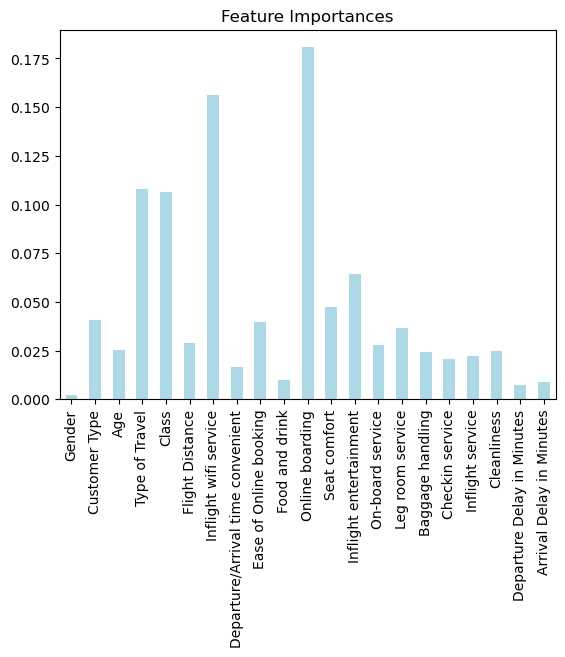

In [78]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importances",legend=False,color=['lightblue']);